In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import torch

from source.mfa.mfa import MFA
from source.wgangp.wgan_model import WGAN_GP
from source.ndb.ndb import NDB

from source.mfa.mfa_utils import get_random_samples
from source.ndb.ndb_utils import sample_from_gan

In [35]:
num_train = 80000
num_test = 20000

dataset_root = "/home/konstantin/datasets"

path_to_fa_model = "/home/konstantin/personal/OnGansAndGMMs/run/e1_fa_256_saved_gmm.pkl"
path_to_ppca_model = "/home/konstantin/personal/OnGansAndGMMs/run/e3_ppca_256_saved_gmm.pkl"
path_to_wgangp_model = "/home/konstantin/personal/OnGansAndGMMs/run/wgangp_gen_30.pt"

In [36]:
fa_gmm_model = MFA()
fa_gmm_model.load(path_to_fa_model)

In [37]:
ppca_gmm_model = MFA()
ppca_gmm_model.load(path_to_ppca_model)

In [38]:
z_dim = 100
wgangp_model = WGAN_GP(3, z_dim).cuda()
wgangp_model.G.load_state_dict(torch.load(path_to_wgangp_model))

<All keys matched successfully>

In [39]:
train_samples = get_random_samples(dataset_root, num_train).detach().numpy()

In [40]:
fa_samples = fa_gmm_model.draw_samples(num_test, False)
ppca_samples = ppca_gmm_model.draw_samples(num_test, False)
wgangp_samples = sample_from_gan(wgangp_model.G, z_dim, num_test)

## NDB test

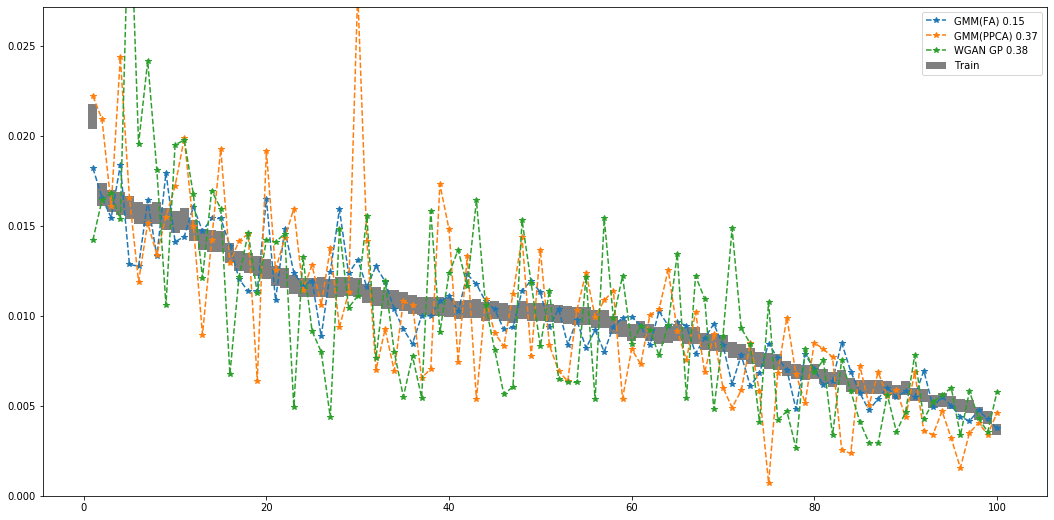

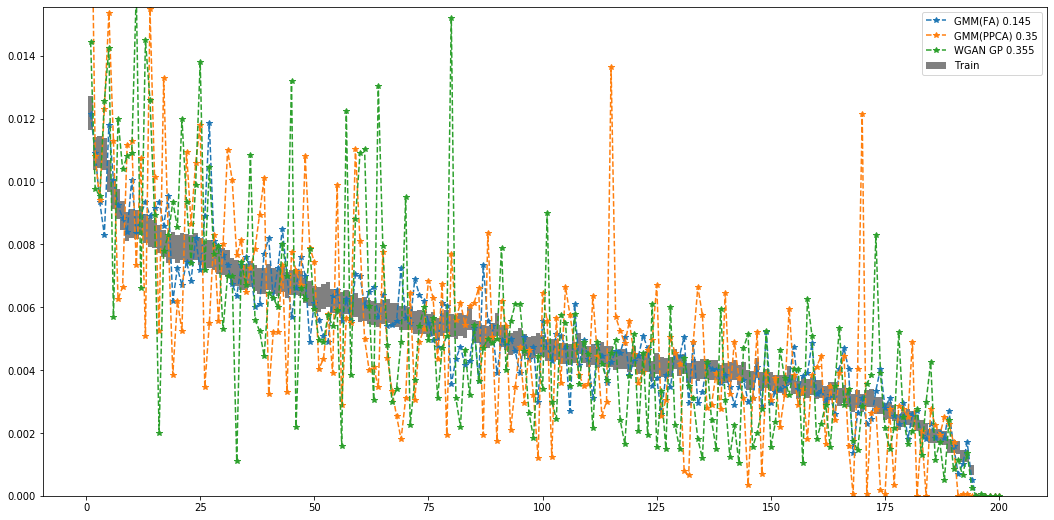

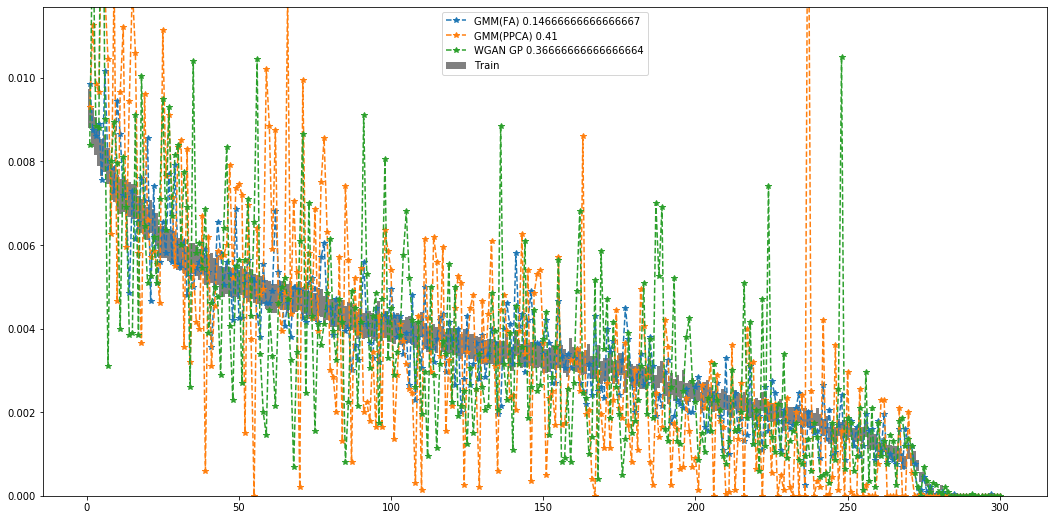

In [41]:
for i in (100, 200, 300):
    ndb = NDB(train_samples, k_clusters=i)
    
    fa_z_stat = ndb.calculate(fa_samples)
    ppca_z_stat = ndb.calculate(ppca_samples)
    wgangp_z_stat = ndb.calculate(wgangp_samples)
    
    ndb.plot_hist([(fa_samples, f"GMM(FA) {fa_z_stat[0]}"),
                   (ppca_samples, f"GMM(PPCA) {ppca_z_stat[0]}"),
                   (wgangp_samples, f"WGAN GP {wgangp_z_stat[0]}")])